In [1]:
#import libraries
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
#import sompy
#from sompy.visualization.mapview import View2D
#from sompy.visualization.bmuhits import BmuHitsView
#from sompy.visualization.hitmap import HitMapView
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
# Seeting seaborn style
sns.set()
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import iqr as IQR
from collections import Counter
import scipy.stats as stat
#from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
#, export_graphviz
from sklearn.model_selection import train_test_split

In [2]:
#import file
df = pd.read_csv('pvadonors_preprocessed_12.01.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
df

,STATE,ZIP,INCOME,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT,AGE,TIME_AS_DONOR,SES,WEALTH3,PERCGIFTCARDPROMO,GAPLASTGIFT,AVGGAPBTWGIFTS,x0_1,x1_1,x2_1,x3_1,x4_1,x5_1,x6_C1LM,x6_C1MM,x6_C2CM,x6_C2LM,x6_C2MM,x6_C5CM,x6_C5MM,x6_D1CM,x6_D2CM,x6_D2MM,x6_D5CM,x6_D5MM,x6_D5TM,x6_I1CM,x6_I1LM,x6_I2CM,x6_I2MM,x6_I5MM,x6_L1CM,x6_L1LM,x6_L2CM,x6_L2LM,x6_L2TM,x6_XXXX,x7_U,x8_M,x9_1,x9_2,x9_3,x10_1,x11_1,x12_1,x13_1,x14_1,x15_1,x16_1,x17_1,x18_1,x19_1,x20_1,x21_1,x22_1,x23_1,x24_1,x25_1,x26_1,x27_1,x28_1,x29_1,x29_2,x29_3,x30_1,x31_1,x33_2,x33_3,x33_4,x34_E,x34_F,x34_G,x35_D,x35_I,x35_L,x35_X,x36_2,x36_5,x36_X,x37_L,x37_M,x37_T,x37_X,x38_B,x38_C,x38_D,x39_R,x39_S,x39_T,x39_U,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH13,AGE901,AGE904,CHIL1,CHIL2,CHIL3,HHAGE1,HHN1,HHN2,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW4,DW7,HU1,HU3,HU5,HHD1,HHD4,HHD5,HHD6,HHD7,HUR1,RHP3,RHP4,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,IC1,IC2,IC3,IC4,IC5,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,PEC1,PEC2,LFC1,LFC7,LFC8,LFC9,LFC10,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC4,OEDC5,OEDC6,OEDC7,EC4,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC2,VOC3,MHUC1,MHUC2,PC0,PC1,PC2,PC3,PC4,PC0.1,PC1.1,PC2.1,PC0.2,PC1.2,PC0.3,PC0.4,PC1.3,PC2.2,PC3.1,PC0.5,PC1.4,PC2.3,PC3.2,PC0.6,PC1.5,PC2.4,PC3.3,PC4.1,PC5,PC0.7,PC1.6,PC2.5,PC3.4,PC4.2,PC5.1,PC6,PC7,PC0.8,PC1.7,PC2.6,PC3.5,PC4.3,PC0.9,PC1.8,PC2.7
0,IL,61081,-1.054116,-0.477134,-0.210733,-0.149042,-0.400302,-0.140944,-0.337886,-0.214834,-0.157398,-0.189468,-0.219686,-0.350822,-0.211846,-0.250878,-0.049989,-0.176971,-0.207864,0.743001,0.281481,-0.838640,0.735986,-0.509682,-0.511822,0.034367,0.189134,1.019263,1.229694,0.574606,0.331637,1.311076,2.596994,2.006501,-0.368214,-0.482733,-0.571046,-0.604846,0.229547,0.711640,0.181768,0.004725,1.917707,-0.168674,-0.861022,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.405281,-0.421258,-0.426956,-1.216142,0.673063,0.947465,-0.239520,0.365889,0.322129,-0.384589,-0.221893,-0.411578,0.577270,0.545436,0.569035,-1.062946,0.571307,1.040623,0.113936,-0.403934,-0.099573,0.196014,-0.818966,0.956476,-0.433735,0.257327,0.333740,1.075590,-0.724459,0.916342,0.739152,0.468963,-0.327529,0.177727,0.337482,0.133020,-0.091729,-0.345885,-0.517502,0.343344,-0.336858,-0.602201,0.385517,-0.564869,-0.614353,-0.540005,-0.221756,-0.417636,-0.257430,-0.327720,-0.345655,0.094417,-0.327655,0.458027,-0.989361,-0.149904,0.198135,-0.908240,-0.207221,-0.287088,-0.658280,0.220529,0.931958,-1.408380,-0.728836,-0.034460,-0.294583,-0.843468,2.368565,-1.033128,-1.181729,0.861680,-0.643097,-0.189478,0.115458,-1.036285,1.103268,0.214350,-0.768777,-1.273600,-0.391688,-0.204948,0.698936,-0.949144,-0.509885,0.997592,0.232522,0.524555,-0.907640,0.446462,0.116660,-0.362226,-0.639392,1.538947,-0.269146,-0.333637,0.026919,-0.326122,-0.363887,-0.473442,-0.194154,-0.279646,-0.751935,1.005742,-0.200698,-0.370558,0.772071,-0.013751,0.125239,0.322529,0.872997,-0.117888,-0.616811,-0.397579,0.935290,-0.109868,-1.819856,-0.260711,-0.344165,1.077312,0.598209,0.093254,-1.380912,0.477246,1.715556,-1.225201,-1.091617,1.016858,0.084844,-1.223283,-0.835710,1.058767,0.169289,-1.530630,-0.640773,1.027688,0.089751,-0.277544,0.039982,1.653494,0.485642,-0.866908,0.978106,0.795541,-0.891686,1.698921,0.871032,-0.682404,0.411411,-0.204844,-0.770984,1.060282,-1.140544,-0.750519,-0.010

In [4]:
non_metric_features = df.columns[df.columns.str.startswith('x')]
pc_features = df.columns[df.columns.str.startswith('PC')]
metric_features = df.columns[~df.columns.str.startswith('x') & ~df.columns.str.startswith('PC')]
metric_features = metric_features.drop('STATE')
metric_features = metric_features.drop('ZIP')


In [5]:
metric_promo =['CARDPROM', 'NUMPROM','CARDPM12', 'NUMPRM12', 'RAMNTALL', 'NGIFTALL', 'CARDGIFT', 'MINRAMNT',
                'MAXRAMNT', 'LASTGIFT', 'AVGGIFT','PERCGIFTCARDPROMO','GAPLASTGIFT', 'AVGGAPBTWGIFTS']
metric_donors = ['INCOME', 'WEALTH3', 'MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV',
                  'AGE','SES']

In [6]:
df[metric_features].describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

,INCOME,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT,AGE,TIME_AS_DONOR,SES,WEALTH3,PERCGIFTCARDPROMO,GAPLASTGIFT,AVGGAPBTWGIFTS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH13,AGE901,AGE904,CHIL1,CHIL2,CHIL3,HHAGE1,HHN1,HHN2,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW4,DW7,HU1,HU3,HU5,HHD1,HHD4,HHD5,HHD6,HHD7,HUR1,RHP3,RHP4,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,IC1,IC2,IC3,IC4,IC5,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,PEC1,PEC2,LFC1,LFC7,LFC8,LFC9,LFC10,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC4,OEDC5,OEDC6,OEDC7,EC4,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC2,VOC3,MHUC1,MHUC2
count,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828
mean,6.58077e-16,-1.56265e-16,9.11795e-16,-1.92647e-15,2.41826e-15,-7.48373e-16,1.40635e-15,2.80849e-15,9.68963e-16,8.49154e-16,4.0635e-15,-6.18318e-17,-1.27892e-15,5.6138e-16,4.63651e-15,-8.73139e-17,2.73734e-16,2.40855e-16,-2.12624e-16,-1.86278e-16,-1.14645e-16,-6.32632e-16,-1.10149e-15,6.83248e-16,-3.53494e-15,2.19722e-16,-3.14003e-16,6.72906e-16,4.65857e-16,1.72887e-17,-4.90323e-16,-1.90516e-15,1.53111e-15,7.59794e-15,6.63278e-16,1.45096e-16,3.06454e-16,-9.37605e-16,-1.58817e-15,-1.23097e-16,6.00163e-16,-3.12499e-15,-5.132e-16,-1.99769e-17,1.29989e-17,-7.44379e-18,-9.08146e-17,5.26179e-15,1.70534e-15,-3.33507e-17,9.57277e-16,5.21215e-16,8.93857e-16,1.00396e-15,2.97898e-15,1.81942e-15,3.46617e-16,9.60634e-18,-1.85767e-15,8.10677e-17,-9.27594e-17,6.08487e-16,-1.55897e-15,2.74347e-16,2.20614e-16,-1.12553e-16,3.88683e-16,-8.33535e-17,2.80013e-17,5.26043e-16,-1.70604e-16,1.35691e-17,-6.33379e-16,-3.18335e-16,5.48791e-16,-6.22615e-16,-1.08741e-16,2.96172e-17,-1.54126e-16,1.37356e-16,-1.02841e-15,-3.1317e-16,-2.55762e-17,1.33259e-15,1.79063e-15,2.37679e-16,-2.57234e-16,-2.36324e-16,-1.21797e-15,1.82836e-16,8.41529e-17,8.67761e-17,1.26946e-17,1.44752e-16,4.61077e-17,2.93323e-16,-4.99336e-17,3.32109e-17,-7.6792e-17,1.7587e-17,2.61656e-16,-5.68564e-16,1.19452e-16,-4.71909e-16,1.29478e-16,2.37909e-16,-5.53708e-16,3.82778e-16,4.30655e-16,-1.94093e-15,5.04324e-16,2.07648e-16,-4.96684e-16,6.70542e-16,-3.55672e-16,-1.87764e-16,7.41021e-16,-7.29188e-16,-3.33111e-17,-1.31644e-15,-3.40533e-16,-6.18306e-16,-1.35375e-16,-3.23595e-16,-1.93185e-16,-2.61673e-16,2.46663e-16,-1.03993e-15,-9.27753e-18,5.22145e-17,-2.13428e-16,3.42303e-17,2.81156e-16,-6.50888e-16,-1.5862e-16,2.76823e-15,7.88162e-18,-5.84208e-16,1.23387e-15,1.85934e-16,3.70739e-16,7.89488e-16,1.83537e-15,1.18326e-15,1.27201e-16,-8.37447e-17,-7.02845e-16,-3.67154e-15,-1.83108e-16,1.47374e-16,-1.78554e-16,1.08881e-15,-2.75104e-16,9.00421e-17,2.3588e-17,-7.13529e-17,-2.95953e-15
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1

In [7]:
df_dbscan = df[metric_features].copy()

In [8]:
df_dbscan.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

,INCOME,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,AVGGIFT,AGE,TIME_AS_DONOR,SES,WEALTH3,PERCGIFTCARDPROMO,GAPLASTGIFT,AVGGAPBTWGIFTS,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH13,AGE901,AGE904,CHIL1,CHIL2,CHIL3,HHAGE1,HHN1,HHN2,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW4,DW7,HU1,HU3,HU5,HHD1,HHD4,HHD5,HHD6,HHD7,HUR1,RHP3,RHP4,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,IC1,IC2,IC3,IC4,IC5,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,PEC1,PEC2,LFC1,LFC7,LFC8,LFC9,LFC10,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC4,OEDC5,OEDC6,OEDC7,EC4,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC4,VOC1,VOC2,VOC3,MHUC1,MHUC2
count,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828,90828
mean,6.58077e-16,-1.56265e-16,9.11795e-16,-1.92647e-15,2.41826e-15,-7.48373e-16,1.40635e-15,2.80849e-15,9.68963e-16,8.49154e-16,4.0635e-15,-6.18318e-17,-1.27892e-15,5.6138e-16,4.63651e-15,-8.73139e-17,2.73734e-16,2.40855e-16,-2.12624e-16,-1.86278e-16,-1.14645e-16,-6.32632e-16,-1.10149e-15,6.83248e-16,-3.53494e-15,2.19722e-16,-3.14003e-16,6.72906e-16,4.65857e-16,1.72887e-17,-4.90323e-16,-1.90516e-15,1.53111e-15,7.59794e-15,6.63278e-16,1.45096e-16,3.06454e-16,-9.37605e-16,-1.58817e-15,-1.23097e-16,6.00163e-16,-3.12499e-15,-5.132e-16,-1.99769e-17,1.29989e-17,-7.44379e-18,-9.08146e-17,5.26179e-15,1.70534e-15,-3.33507e-17,9.57277e-16,5.21215e-16,8.93857e-16,1.00396e-15,2.97898e-15,1.81942e-15,3.46617e-16,9.60634e-18,-1.85767e-15,8.10677e-17,-9.27594e-17,6.08487e-16,-1.55897e-15,2.74347e-16,2.20614e-16,-1.12553e-16,3.88683e-16,-8.33535e-17,2.80013e-17,5.26043e-16,-1.70604e-16,1.35691e-17,-6.33379e-16,-3.18335e-16,5.48791e-16,-6.22615e-16,-1.08741e-16,2.96172e-17,-1.54126e-16,1.37356e-16,-1.02841e-15,-3.1317e-16,-2.55762e-17,1.33259e-15,1.79063e-15,2.37679e-16,-2.57234e-16,-2.36324e-16,-1.21797e-15,1.82836e-16,8.41529e-17,8.67761e-17,1.26946e-17,1.44752e-16,4.61077e-17,2.93323e-16,-4.99336e-17,3.32109e-17,-7.6792e-17,1.7587e-17,2.61656e-16,-5.68564e-16,1.19452e-16,-4.71909e-16,1.29478e-16,2.37909e-16,-5.53708e-16,3.82778e-16,4.30655e-16,-1.94093e-15,5.04324e-16,2.07648e-16,-4.96684e-16,6.70542e-16,-3.55672e-16,-1.87764e-16,7.41021e-16,-7.29188e-16,-3.33111e-17,-1.31644e-15,-3.40533e-16,-6.18306e-16,-1.35375e-16,-3.23595e-16,-1.93185e-16,-2.61673e-16,2.46663e-16,-1.03993e-15,-9.27753e-18,5.22145e-17,-2.13428e-16,3.42303e-17,2.81156e-16,-6.50888e-16,-1.5862e-16,2.76823e-15,7.88162e-18,-5.84208e-16,1.23387e-15,1.85934e-16,3.70739e-16,7.89488e-16,1.83537e-15,1.18326e-15,1.27201e-16,-8.37447e-17,-7.02845e-16,-3.67154e-15,-1.83108e-16,1.47374e-16,-1.78554e-16,1.08881e-15,-2.75104e-16,9.00421e-17,2.3588e-17,-7.13529e-17,-2.95953e-15
std,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1.00001,1

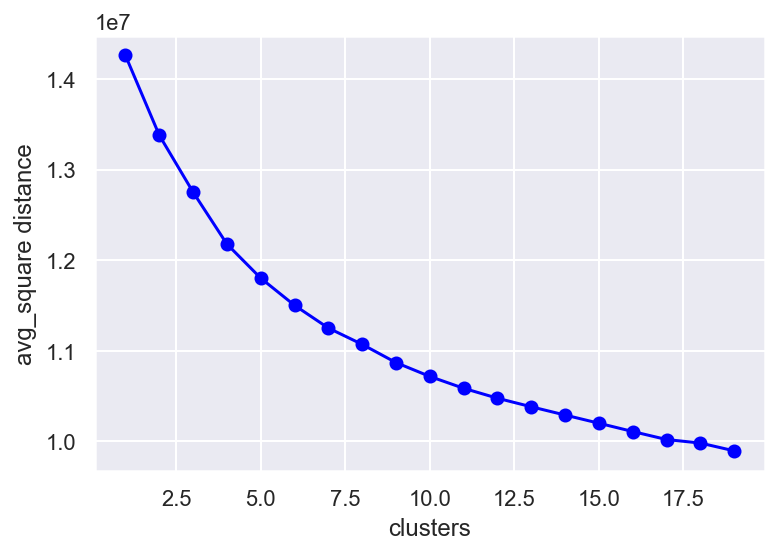

In [9]:
inert = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_dbscan)
    inert.append(kmeanModel.inertia_)
#Define name for x axis and y axis
plt.xlabel("clusters")
plt.ylabel("avg_square distance")
plt.plot(K,inert,"o-",color="blue")

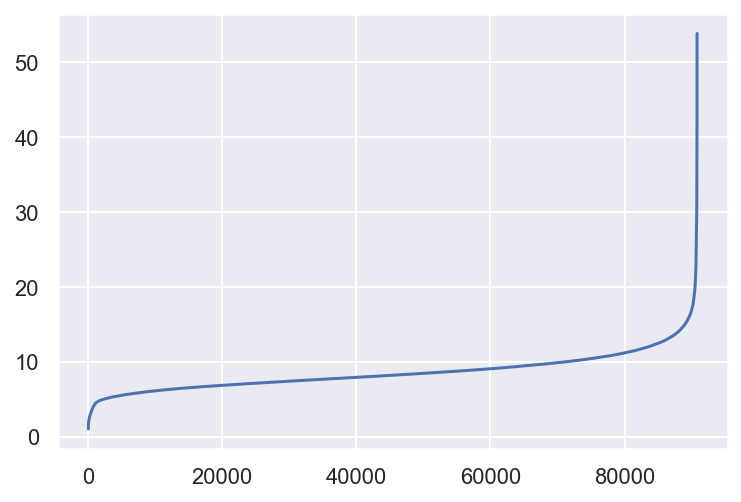

In [10]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=6)
neigh.fit(df_dbscan)
distances, _ = neigh.kneighbors(df_dbscan)
distances = np.sort(distances[:, -1])
plt.plot(distances)
# plt.subplot(1.1,figsize=(20,15))
plt.figure(1, figsize=(20, 10))
plt.show()

In [ ]:
dbscan = DBSCAN(eps=15, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_dbscan)
Counter(dbscan_labels)

In [ ]:
# Save the newly detected outliers (they will be classified later based on the final clusters)
df_out = df[dbscan_labels==-1].copy()

# New df without outliers
df_dbscan_new = df[dbscan_labels!=-1].copy()

In [ ]:
df_dbscan_new.shape

In [ ]:
df = df_dbscan_new.copy()

In [ ]:
df_promo_metric = df[metric_promo].copy()
df_donors_metric = df[metric_donors].copy()

In [ ]:
df_promo_metric.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

In [ ]:
df_donors_metric.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

In [ ]:
#FUNCTION TO CALCULATE R2
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=15):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

In [ ]:
#iNITIAL KMEANS
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

In [ ]:
# Obtaining the R² scores
r2_scores = {}

r2_scores['kmeans_promo'] = get_r2_scores(df_promo_metric, kmeans)
r2_scores['kmeans_donors'] = get_r2_scores(df_donors_metric, kmeans)

# Visualizing the R² scores for each cluster solution
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))
plt.title("Product Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

In [ ]:
#table of R2
pd.DataFrame(r2_scores)

In [ ]:
#RUN KMEANS TO EACH GROUP OF VARIABLES
kmeans_promo = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=20,
    random_state=42
)
promo_labels = kmeans_promo.fit_predict(df_promo_metric)

kmeans_donors = KMeans(
    n_clusters=5,
    init='k-means++',
    n_init=20,
    random_state=42
)
donors_labels = kmeans_donors.fit_predict(df_donors_metric)

#SAVE THE CLUSTERS IN THE DATASET


df['promo_labels'] = promo_labels
df['donors_labels'] = donors_labels

In [ ]:
df

In [ ]:
#Check the partion cluster
df.groupby('promo_labels').count()

In [ ]:
#Check the partion cluster
df.groupby('donors_labels').count()

In [ ]:
# Count label frequencies (contigency table)
df.groupby(['donors_labels', 'promo_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('donors_labels', 'promo_labels', 0)

In [ ]:
# Clusters with low frequency to be merged:
to_merge = [(1,1)] 


df_centroids1 = df.groupby(['donors_labels', 'promo_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids1)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids1.index, index=df_centroids1.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

In [ ]:
df_ = df.copy()

# Changing the labels based on source_target
for source, target in source_target.items():
    mask = (df_['donors_labels']==source[0]) & (df_['promo_labels']==source[1])
    df_.loc[mask, 'donors_labels'] = target[0]
    df_.loc[mask, 'promo_labels'] = target[1]

# New contigency table
df_.groupby(['donors_labels', 'promo_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('donors_labels', 'promo_labels', 0)

In [ ]:
df_

In [ ]:
#set the centroids
df_centroids1 = df.groupby(['donors_labels', 'promo_labels'])\
    [metric_features].mean()
df_centroids1

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids1)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters 
y_threshold = 7
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids1.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=8
)
hclust_labels = hclust.fit_predict(df_centroids1)
df_centroids1['hclust_labels'] = hclust_labels

df_centroids1  # centroid's cluster labels

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids1['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['donors_labels'], row['promo_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels').mean()[metric_features]

In [ ]:
df_

In [ ]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the  labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['donors_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['promo_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])
df_counts.pivot('donors_labels', 'promo_labels', 0)

In [ ]:
#Check the distribution of the clusters
df_.groupby('merged_labels').count()

In [ ]:
df = df_.copy()

In [ ]:
df

In [ ]:
metric_features1 = ['CARDPROM', 'NUMPROM','CARDPM12', 'NUMPRM12', 'RAMNTALL', 'NGIFTALL', 'CARDGIFT',
'MINRAMNT','MAXRAMNT', 'LASTGIFT', 'AVGGIFT','PERCGIFTCARDPROMO','GAPLASTGIFT', 'AVGGAPBTWGIFTS', 'HIT','MALEMILI','MALEVET',
'VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','AGE', 'TIME_AS_DONOR','SES', 'SOLP3','SOLIH','INCOME','WEALTH3']

In [ ]:
df[metric_features1]

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

In [ ]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features1 + ['promo_labels', 'donors_labels', 'merged_labels']], 
    label_columns = ['promo_labels', 'donors_labels', 'merged_labels'], 
    figsize = (28, 20), 
    compar_titles = ["Promo clustering", "Donors clustering", "Merged clusters"]
)

In [ ]:
#function to get the R2 of the variables
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [ ]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(df[metric_features.to_list() + ['merged_labels']], 'merged_labels').drop('merged_labels')

In [ ]:
# Preparing the data
X = df.drop(columns=['promo_labels','donors_labels','merged_labels','STATE','ZIP'])
y = df.merged_labels

In [ ]:
#Check the type of variables to run the decision tree
X.info()

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth = 12,criterion='entropy')
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

In [ ]:
# Assessing feature importance
fi_col = []
fi = []
for i,column in enumerate(X):
    print('The feature importance for {} is : {}'.format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

In [ ]:
df_fi = zip(fi_col,fi)
df_fi = pd.DataFrame(df_fi,columns = ['Features','Features Importance'])
df_fi = df_fi.sort_values('Features Importance',ascending= False).reset_index().drop('index',axis=1)
df_fi

In [ ]:
df_out=df_out.drop(columns=['STATE','ZIP'])

In [ ]:
df_out.info()

In [ ]:
#Predict the clusters for the outliers
df_out['merged_labels'] = dt.predict(df_out)
df_out

In [ ]:
#Graphic to show the 15 features with high importance
df_fi_10 = df_fi[0:15]
sns.barplot(df_fi_10['Features Importance'], df_fi_10['Features'], palette = 'cubehelix', orient = 'h')

In [ ]:
sns.boxplot(x="merged_labels", y='NGIFTALL', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='WEALTH3', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='WWIIVETS', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='VIETVETS', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='NUMPRM12', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='CARDGIFT', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='SES', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='INCOME', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='MALEVET', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='MALEMILI', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='PERCGIFTCARDPROMO', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='AGE', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='FEDGOV', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='RAMNTALL', data=df, palette="Blues")

In [ ]:
sns.boxplot(x="merged_labels", y='GAPLASTGIFT', data=df, palette="Blues")

#TENTATIVE OF RUN OTHER ALGORITHMS TO CLUSTER THAT FAILED. 

In [ ]:
sm = sompy.SOMFactory().build(
    df_pref_metric.values, 
    mapsize=(50, 50), 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=metric_pref
)
sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)
nodes = sm.get_node_vectors()

In [ ]:
hierclust = AgglomerativeClustering(linkage='ward')
nodeclus_labels = sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [ ]:
df_nodes = pd.DataFrame(nodes, columns=metric_pref)
df_nodes['label'] = nodeclus_labels
bmus_map = sm.find_bmu(df_pref_metric)[0]  # get bmus for each observation in df
df_bmus = pd.DataFrame(
    np.concatenate((df_pref_metric, np.expand_dims(bmus_map,1)), axis=1),
    index=df_pref_metric.index, columns=np.append(df_pref_metric.columns,"BMU")
)
df_final = df_bmus.merge(df_nodes['label'], 'left', left_on="BMU", right_index=True)
df_final.drop(columns='BMU').groupby('label').mean()

In [ ]:
sst = get_ss(df_final[metric_pref])
ssw_labels = df_final[metric_pref + ["label"]].groupby(by='label').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

#TENTATIVE 2

In [ ]:
metric_census= ['CHIL1','CHIL2','CHIL3','MARR1','MARR2','MARR3','MARR4','HHD1','HHD4','HHD5','HHD6','HHD7','IC5','IC3','IC4']
pc_census = ['PC0.2','PC1.2','PC0.3','PC0.4','PC1.3','PC0.5','PC1.4','PC0.6','PC1.5','PC2.1','PC3.1','PC0.7','PC1.6','PC2.2',
'PC0.8','PC1.7','PC2.3','PC3.2']

In [ ]:
df_census_metric = df[metric_census].copy()
df_pccensus_metric = df[pc_census].copy()

In [ ]:
kmeans_census = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init=20,
    random_state=42
)
census_labels = kmeans_census.fit_predict(df_census_metric)

kmeans_pccensus = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=20,
    random_state=42
)
pccensus_labels = kmeans_pccensus.fit_predict(df_pccensus_metric)

df['census_labels'] = census_labels
df['pccensus_labels'] = pccensus_labels

In [ ]:
# Count label frequencies (contigency table)
df.groupby(['census_labels', 'pccensus_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('census_labels', 'pccensus_labels', 0)

In [ ]:
# Clusters with low frequency to be merged:
to_merge = [(0,2),(1,1),(4,0),(4,1)] 


df_centroids2 = df.groupby(['census_labels', 'pccensus_labels'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids2)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids2.index, index=df_centroids2.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

In [ ]:
df_ = df.copy()

# Changing the labels based on source_target
for source, target in source_target.items():
    mask = (df_['census_labels']==source[0]) & (df_['pccensus_labels']==source[1])
    df_.loc[mask, 'census_labels'] = target[0]
    df_.loc[mask, 'pccensus_labels'] = target[1]

# New contigency table
df_.groupby(['census_labels', 'pccensus_labels'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('census_labels', 'pccensus_labels', 0)

In [ ]:
df_

In [ ]:
df_centroids2 = df.groupby(['census_labels', 'pccensus_labels'])\
    [metric_features].mean()
df_centroids2

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids2)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 10
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids2.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=6
)
hclust_labels = hclust.fit_predict(df_centroids2)
df_centroids2['hclust_labels'] = hclust_labels

df_centroids2  # centroid's cluster labels

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids2['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels2'] = df_.apply(
    lambda row: cluster_mapper[
        (row['census_labels'], row['pccensus_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels2').mean()[metric_features]

In [ ]:
df_

In [ ]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels2')\
    .size()\
    .to_frame()

# Getting the  labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['census_labels'] = df_counts['merged_labels2'].apply(lambda x: x[0])
df_counts['pccensus_labels'] = df_counts['merged_labels2'].apply(lambda x: x[1])
df_counts.pivot('census_labels', 'pccensus_labels', 0)

In [ ]:
df_.groupby('merged_labels2').count()

In [ ]:
df = df_.copy()

In [ ]:
df

In [ ]:
# Count label frequencies (contigency table)
df.groupby(['merged_labels', 'merged_labels2'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('merged_labels', 'merged_labels2', 0)

In [ ]:
# Clusters with low frequency to be merged:
to_merge = [(0,4), (0,5),(2,1),(2,4),(3,4), (3,5),(4,4),(4,5), (5,1),(6,3),(7,0),(7,1),(7,2)] 


df_centroids3 = df.groupby(['merged_labels', 'merged_labels2'])\
    [metric_features].mean()

# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids3)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids3.index, index=df_centroids3.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

In [ ]:
df_ = df.copy()

# Changing the labels based on source_target
for source, target in source_target.items():
    mask = (df_['merged_labels']==source[0]) & (df_['merged_labels2']==source[1])
    df_.loc[mask, 'merged_labels'] = target[0]
    df_.loc[mask, 'merged_labels2'] = target[1]

# New contigency table
df_.groupby(['merged_labels', 'merged_labels2'])\
    .size()\
    .to_frame()\
    .reset_index()\
    .pivot('merged_labels', 'merged_labels2', 0)

In [ ]:
df_

In [ ]:
df_centroids3 = df.groupby(['merged_labels', 'merged_labels2'])\
    [metric_features].mean()
df_centroids3

In [ ]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids3)

In [ ]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 13
dendrogram(linkage_matrix, truncate_mode='level', labels=df_centroids3.index, p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [ ]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    affinity='euclidean', 
    n_clusters=8
)
hclust_labels = hclust.fit_predict(df_centroids3)
df_centroids3['hclust_labels'] = hclust_labels

df_centroids3  # centroid's cluster labels

In [ ]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids3['hclust_labels'].to_dict()

df_ = df.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels3'] = df_.apply(
    lambda row: cluster_mapper[
        (row['merged_labels'], row['merged_labels2'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels3').mean()[metric_features]

In [ ]:
df_

In [ ]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels3')\
    .size()\
    .to_frame()

# Getting the  labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['merged_labels'] = df_counts['merged_labels3'].apply(lambda x: x[0])
df_counts['merged_labels2'] = df_counts['merged_labels3'].apply(lambda x: x[1])
df_counts.pivot('merged_labels', 'merged_labels2', 0)

In [ ]:
df_.groupby('merged_labels3').count()